# 4 假设检验与区间估计
## 4.1 单样本检验：以汽车引擎排放水平测试为例

In [1]:
#导入包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#样本数据集
dataSer=pd.Series([15.6,16.2,22.5,20.5,16.4 ,
                   19.4,16.6,17.9,12.7,13.9])
#计算样本均值、样本标准差
sample_mean=dataSer.mean()
sample_std=dataSer.std()
print('样本均值为：%.2fppm'%sample_mean)
print('样本标准差为：%.2fppm'%sample_std)

样本均值为：17.17ppm
样本标准差为：2.98ppm


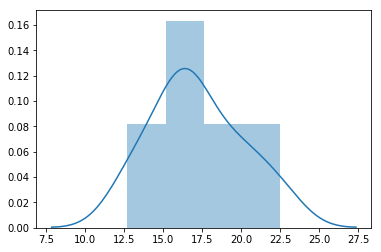

In [4]:
#通过直方图查看数据分布，还可做出拟合曲线
sns.distplot(dataSer)

In [5]:
#1. 计算标准误差
n=10
SE=sample_std/(np.sqrt(n))
#2. 计算t值
pop_mean=20
t=(sample_mean-pop_mean)/SE
print('标准误差为%.2f'%SE)
print('t=%.3f'%t)

标准误差为0.94
t=-3.002


In [6]:
from scipy import stats
t,p_twotail=stats.ttest_1samp(dataSer,pop_mean)
p_onetail=p_twotail/2
print('假设检验t值为%.3f，相应的概率p值为%.4f'%(t,p_onetail))

假设检验t值为-3.002，相应的概率p值为0.0075


In [13]:
#计算置信区间：
#按照df=9,置信水平为95%查表得t值（此处应为双尾）
t_ci=2.2622
SE=stats.sem(dataSer)  #scipy计算标准误差
#置信区间上下限
a=sample_mean-t_ci*SE
b=sample_mean+t_ci*SE
print('单个平均值的置信区间，95置信水平CI=[%.3f,%.3f]'%(a,b))

单个平均值的置信区间，95置信水平CI=[15.037,19.303]


In [8]:
#均值比较值：Cohen's d
d=(sample_mean-pop_mean)/sample_std
#R平方
df=n-1
R2=(t*t)/(t*t+df)
print('d=%.2F'%d)
print('R2=%.2F'%R2)

d=-0.95
R2=0.50


## 4.2 双样本检验 

In [9]:
import pandas as pd
import numpy as np

aSer = pd.Series([20.5,19.8,19.7,20.4,20.1,20.0,19.0,19.9])
bSer = pd.Series([19.7,20.8,20.5,19.8,19.4,20.6,19.2])

In [10]:
a_mean = aSer.mean()
b_mean = bSer.mean()
print('甲机床加工的产品直径=',a_mean,'单位：mm')
print('乙机床加工的产品直径=',b_mean,'单位：mm')
a_std = aSer.std()
b_std = bSer.std()
print('甲机床加工的产品直径标准差=',a_std,'单位：mm')
print('乙机床加工的产品直径标准差=',b_std,'单位：mm')

甲机床加工的产品直径= 19.925 单位：mm
乙机床加工的产品直径= 19.999999999999996 单位：mm
甲机床加工的产品直径标准差= 0.4652188425123937 单位：mm
乙机床加工的产品直径标准差= 0.6298147875897069 单位：mm


In [11]:
import statsmodels.stats.weightstats as st
t,p_two,df = st.ttest_ind(aSer,bSer,usevar='unequal')
print('t=',t,'p_two=',p_two,'df=',df)

t= -0.2592065883746012 p_two= 0.8002815375230089 df= 10.956106306156496


In [12]:
t_ci = 2.2010
a_n = len(aSer)
b_n = len(bSer)
se = np.sqrt(np.square(a_std)/a_n + np.square(b_std)/b_n)

In [14]:
sample_mean = a_mean - b_mean
a = sample_mean - t_ci * se
b = sample_mean + t_ci * se
print('95置信水平下，两个平均值差值的置信区间 CI=(%f,%f)'%(a,b))

95置信水平下，两个平均值差值的置信区间 CI=(-0.729555,0.579555)
